## Installing the packages

In [269]:
# pip install dython

In [270]:
# pip install association_metrics

In [271]:
# pip install geopy

## Importing the libraries

In [272]:
import os
import sys

import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# from dython.nominal import associations

import copy 

## Reading the dataset

In [273]:
# os.chdir('C:/Users/prach/OneDrive - Singapore Management University/Documents/Term 5/Applied Machine Learning/Project')

In [274]:
cars_original_data = pd.read_csv("used_cars_data.csv", dtype={"vin": object, "back_legroom": object, "bed": object, "bed_height": object, "bed_length": object, "body_type": object, "cabin": object, "city": object, "city_fuel_economy": float, "combine_fuel_economy": float, "daysonmarket": int, "dealer_zip": object, "description": object, "engine_cylinders": object, "engine_displacement": float, "engine_type": object, "exterior_color": object, "fleet": object, "frame_damaged": object, "franchise_dealer": bool, "franchise_make": object, "front_legroom": object, "fuel_tank_volume": object, "fuel_type": object, "has_accidents": object, "height": object, "highway_fuel_economy": float, "horsepower": float, "interior_color": object, "isCab": object, "is_certified": float, "is_cpo": object, "is_new": bool, "is_oemcpo": object, "latitude": float, "length": object, "listed_date": object, "listing_color": object, "listing_id": int, "longitude": float, "main_picture_url": object, "major_options": object, "make_name": object, "maximum_seating": object, "mileage": float, "model_name": object, "owner_count": float, "power": object, "price": float, "salvage": object, "savings_amount": int, "seller_rating": float, "sp_id": float, "sp_name": object, "theft_title": object, "torque": object, "transmission": object, "transmission_display": object, "trimId": object, "trim_name": object, "vehicle_damage_category": float, "wheel_system": object, "wheel_system_display": object, "wheelbase": object, "width": object, "year": int})

In [275]:
cars = cars_original_data.copy(deep=True)

In [276]:
cars.dtypes

vin                         object
back_legroom                object
bed                         object
bed_height                  object
bed_length                  object
body_type                   object
cabin                       object
city                        object
city_fuel_economy          float64
combine_fuel_economy       float64
daysonmarket                 int32
dealer_zip                  object
description                 object
engine_cylinders            object
engine_displacement        float64
engine_type                 object
exterior_color              object
fleet                       object
frame_damaged               object
franchise_dealer              bool
franchise_make              object
front_legroom               object
fuel_tank_volume            object
fuel_type                   object
has_accidents               object
height                      object
highway_fuel_economy       float64
horsepower                 float64
interior_color      

In [277]:
cars.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

## Data Wrangling

### Setting the view parameters

In [278]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.set_printoptions(threshold=sys.maxsize)

### Studying the variables in the dataset

In [279]:
cars.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Determining N and no. of variables

In [280]:
print(cars.shape)

(3000040, 66)


### Splitting torque column to eliminate RPM

In [281]:
new1 = cars["torque"].str.split(" ", n = 1, expand = True)

cars['torque'] = new1[0]

### Splitting engine_type to engine_type and cylinders

In [282]:
new2 = cars['engine_type'].str.extractall(r'([a-zA-Z]+)([0-9]+)').unstack()
new2.columns = ['engine_type', 'cylinders']

In [283]:
cars['engine_type'] = new2['engine_type']
cars['cylinders'] = new2['cylinders']

### Recoding 'has_accidents' into 3 categories: True, False, Unknown (where NaN == Unknown)

In [284]:
np.unique(cars['has_accidents'].values.tolist())

array(['False', 'True', 'nan'], dtype='<U32')

In [285]:
temp = []
for i in cars['has_accidents']:
    if i != 'False' or i!='True':
        temp += ['Unknown']
    else:
        temp += [i]

In [286]:
cars['has_accidents'] = temp

### Calculating AGE variable and appending to the dataset

In [287]:
cars.insert(0, "age", cars["year"].max() + 1 - cars["year"] )

Not doing: Creating make_type column and assigning values based on make_name and median price 

In [288]:
# cars['make_name'] = cars['make_name'].astype('category')

In [289]:
# top100 = cars.groupby('make_name', as_index = False)['price'].median().round(0)
# top100.nlargest(100, 'price')

In [290]:
# cars['make_name'] = cars['make_name'].astype('object')
# cars['make_type'] = np.nan

In [291]:
# make_type = {"Pagani": "Ultra_Luxury", "Koenigsegg": "Ultra_Luxury", "Bugatti": "Ultra_Luxury", "Saleen": "Luxury", "Spyker": "Luxury", "McLaren": "Luxury", "Ferrari": "Luxury", "Rolls-Royce": "Luxury", "Lamborghini": "Luxury", "DeTomaso": "Luxury", "Aston Martin": "Luxury", "Jensen": "Luxury", "Bentley": "Luxury", "Karma": "Luxury", "Shelby": "Luxury", "SRT": "Luxury", "Humber": "Luxury", "Kaiser": "Luxury", "Lotus": "Luxury", "Porsche": "Luxury", "Sunbeam": "Luxury", "AM General": "Luxury", "Allard": "Luxury", "Maserati": "Luxury", "Maybach": "Luxury", "Land Rover": "Luxury", "Austin-Healey": "Luxury", "Ariel": "Luxury", "Tesla": "Luxury", "Packard": "Luxury", "Clenet": "Luxury", "DeLorean": "Luxury", "Mercedes-Benz": "Luxury", "Jaguar": "Luxury", "RAM": "Luxury", "Cadillac": "Luxury", "Genesis": "Luxury", "Audi": "Luxury", "BMW": "Luxury", "Lincoln": "Luxury", "Volvo": "Luxury", "Hudson": "Luxury", "Alfa Romeo": "Midtier", "Freightliner": "Midtier", "Fisker": "Midtier", "Plymouth": "Midtier", "GMC": "Midtier", "Willys": "Midtier", "Lexus": "Midtier", "INFINITI": "Midtier", "Morris": "Midtier", "Acura": "Midtier", "International Harvester": "Midtier", "Ford": "Midtier", "Studebaker": "Midtier", "Jeep": "Midtier", "Chevrolet": "Budget", "Buick": "Budget", "Toyota": "Budget", "Subaru": "Budget", "Honda": "Budget", "Mazda": "Budget", "AMC": "Budget", "Dodge": "Budget", "Chrysler": "Budget", "MINI": "Budget", "Volkswagen": "Budget", "Datsun": "Budget", "VPG": "Budget", "Nissan": "Budget", "Hyundai": "Budget", "Pininfarina": "Budget", "Kia": "Budget", "Franklin": "Budget", "Mobility Ventures": "Budget", "Bricklin": "Budget", "Mitsubishi": "Budget", "Hummer": "Budget", "Triumph": "Budget", "Nash": "Budget", "Austin": "Budget", "MG": "Budget", "FIAT": "Budget", "Rover": "Budget", "Opel": "Budget", "Eagle": "Budget", "Oldsmobile": "Budget", "Hillman": "Economic", "Scion": "Economic", "Pontiac": "Economic", "smart": "Economic", "Saab": "Economic", "Mercury": "Economic", "Edsel": "Economic", "DeSoto": "Economic", "Suzuki": "Economic", "Saturn": "Economic", "Daewoo": "Economic", "Isuzu": "Economic", "Geo": "Economic"}
# cars["make_type"] = cars["make_name"].map(make_type)

In [292]:
cars.sample(20)

,age,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year,cylinders
2774836,1,WBA73AK00M7G37184,NaN,NaN,NaN,NaN,Coupe,NaN,Valencia,NaN,NaN,8,91355,"PREMIUM PACKAGE,PANORAMIC MOONROOF,STORM BAY M...",NaN,NaN,NaN,Storm Bay Metallic,NaN,NaN,True,BMW,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Black,NaN,NaN,NaN,True,NaN,34.4188,NaN,2020-09-04,UNKNOWN,281171128,-118.5550,https://static.cargurus.com/images/forsale/202...,NaN,BMW,NaN,5.0,2 Series,NaN,NaN,45045.0,NaN,0,4.388889,278962.0,Valencia BMW,NaN,NaN,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
852523,16,1FTNE24L36DB14387,NaN,NaN,NaN,NaN,Van,NaN,Crest Hill,NaN,NaN,76,60403,"LEATHER SEATS, SHELVING INCLUDED AND MUCH MORE...",V8,4600.0,V,White,False,False,False,NaN,NaN,NaN,Gasoline,Unknown,NaN,NaN,225.0,Gray,False,NaN,NaN,False,NaN,41.5541,NaN,2020-06-26,WHITE,274987652,-88.0882,https://static.cargurus.com/images/forsale/202...,['Leather Seats'],Ford,NaN,114644.0,E-Series,4.0,"225 hp @ 4,800 RPM",7999.0,False,678,4.600000,377903.0,Car Mas,False,286,A,4-Speed Automatic,t92443,E-250 Cargo Van,NaN,RWD,Rear-Wheel Drive,NaN,NaN,2006,8
418188,5,2C3CDXL91HH620050,40.1 in,NaN,NaN,NaN,Sedan,NaN,East Brunswick,13.0,NaN,31,08816,"ONE OWNER, RECENT TRADE IN, Charger SRT Hellca...",V8,6200.0,V,Destroyer Gray Clearcoat,False,False,True,Dodge,41.8 in,18.5 gal,Gasoline,Unknown,58.3 in,22.0,707.0,Black,False,NaN,NaN,False,NaN,40.4484,200.8 in,2020-08-10,GRAY,278895314,-74.3968,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Dodge,5 seats,18021.0,Charger,1.0,"707 hp @ 6,200 RPM",58000.0,False,1893,3.916667,341270.0,Route 18 Chrysler Jeep Dodge Ram,False,650,A,Automatic,t70182,SRT Hellcat RWD,NaN,RWD,Rear-Wheel Drive,120.4 in,75 in,2017,8
290868,2,1C4HJXEG7LW318746,38.3 in,NaN,NaN,NaN,SUV / Crossover,NaN,Clifton Park,18.0,NaN,45,12065,Zappone Chrysler Jeep Dodge Ram is honored to ...,V6,3000.0,V,Ocean Blue Metallic Clearcoat,NaN,NaN,True,Jeep,41.2 in,21.5 gal,Gasoline,Unknown,73.6 in,22.0,260.0,Black,NaN,NaN,NaN,True,NaN,42.8778,188.4 in,2020-07-26,BLUE,277641307,-73.7740,NaN,"['Leather Seats', 'Navigation System', 'Alloy ...",Jeep,5 seats,301.0,Wrangler Unlimited,NaN,"260 hp @ 3,600 RPM",54935.0,NaN,0,5.000000,337505.0,Zappone Chrysler Jeep Dodge Ram,NaN,442,A,8-Speed Automatic,t86723,Sahara 4WD,NaN,4WD,Four-Wheel Drive,118.4 in,73.8 in,2020,6
2301473,2,1FTEW1CP5LKF03910,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,Glendale,20.0,NaN,19,85301,New Price! Oxford White 2020 Ford F-150 XL RWD...,V6,3500.0,V,Oxford White,False,False,True,Ford,43.9 in,26 gal,Gasoline,Unknown,75.6 in,26.0,375.0,Medium Earth Gray,False,NaN,NaN,True,NaN,33.5301,231.9 in,2020-08-23,WHITE,280110051,-112.1690,NaN,"['101A Mid Equipment Group', 'Appearance Packa...",Ford,6 seats,NaN,F-150,NaN,"395 hp @ 5,750 RPM",35815.0,False,0,4.818182,53740.0,Sanderson Ford,False,400,A,Automatic,t87709,XL SuperCrew RWD,NaN,4X2,4X2,145 in,96.8 in,2020,6
1601589,11,2CNALDEC0B6279395,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Sioux Falls,22.0,NaN,9,57106,This clean 2011 Chevy Equinox is a nice compac...,I4,2400.0,I,BROWN,False,False,False,NaN,41.2 in,18.8 gal,Gasoline,Unknown,66.3 in,32.0,182.0,None,False,NaN,NaN,False,NaN,43.5439,187.8 in,2020-09-01,BROWN,280974519,-96.7893,https://static.cargurus.com/im

### Checking for missing values in each column

In [293]:
cars.isnull().sum()

age                              0
vin                              0
back_legroom                159269
bed                        2980472
bed_height                 2570942
bed_length                 2570942
body_type                    13543
cabin                      2936507
city                             0
city_fuel_economy           491285
combine_fuel_economy       3000040
daysonmarket                     0
dealer_zip                       0
description                  77901
engine_cylinders            100581
engine_displacement         172386
engine_type                 100581
exterior_color                  26
fleet                      1426595
frame_damaged              1426595
franchise_dealer                 0
franchise_make              572635
front_legroom               159269
fuel_tank_volume            159269
fuel_type                    82724
has_accidents                    0
height                      159269
highway_fuel_economy        491285
horsepower          

### Moving the dependent variable PRICE to the end of the dataframe

In [294]:
price = pd.DataFrame()
price['price'] = cars['price']
cars = cars.drop(columns = 'price')
cars['price'] = price['price']

### Dropping columns that are IDs, have unique values, are dates, have missing value proportion over 20% or are not realistic to be included in the model (from a business & customer perspective)

In [295]:
cars = cars.drop(['vin', 'bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'description', 'fleet', 'frame_damaged', 'isCab', 'is_certified', 'is_cpo', 'is_oemcpo', 'listing_id', 'listed_date', 'main_picture_url', 'savings_amount', 'major_options', 'owner_count', 'salvage', 'sp_id', 'theft_title', 'trimId', 'vehicle_damage_category', 'year', 'model_name'], axis =1)


In [296]:
cars.isnull().sum()

age                          0
back_legroom            159269
body_type                13543
city                         0
city_fuel_economy       491285
daysonmarket                 0
dealer_zip                   0
engine_cylinders        100581
engine_displacement     172386
engine_type             100581
exterior_color              26
franchise_dealer             0
franchise_make          572635
front_legroom           159269
fuel_tank_volume        159269
fuel_type                82724
has_accidents                0
height                  159269
highway_fuel_economy    491285
horsepower              172386
interior_color             165
is_new                       0
latitude                     0
length                  159269
listing_color                0
longitude                    0
make_name                    0
maximum_seating         159269
mileage                 144387
power                   481426
seller_rating            40872
sp_name                      0
torque  

In [297]:
cars.iloc[35]

age                                               2
back_legroom                                38.1 in
body_type                           SUV / Crossover
city                                       San Juan
city_fuel_economy                               NaN
daysonmarket                                    230
dealer_zip                                    00922
engine_cylinders                                 I4
engine_displacement                          2000.0
engine_type                                       I
exterior_color                 Namib Orange Premium
franchise_dealer                               True
franchise_make                           Land Rover
front_legroom                               39.1 in
fuel_tank_volume                           17.7 gal
fuel_type                                  Gasoline
has_accidents                               Unknown
height                                        68 in
highway_fuel_economy                            NaN
horsepower  

### Excluding string of measure from continuous variables

In [298]:
cars['back_legroom'] = cars['back_legroom'].str.replace(" in", "")

cars['front_legroom'] = cars['front_legroom'].str.replace(" in", "")

cars['fuel_tank_volume'] = cars['fuel_tank_volume'].str.replace(" gal", "")

cars['height'] = cars['height'].str.replace(" in", "")

cars['length'] = cars['length'].str.replace(" in", "")

cars['width'] = cars['width'].str.replace(" in", "")

cars['wheelbase'] = cars['wheelbase'].str.replace(" in", "")

### Replacing row values containing "--" with Nan

In [299]:
cars = cars.replace('--', np.nan, regex = True)

KeyboardInterrupt: 

In [ ]:
len(cars)

3000040

In [ ]:
cars = cars.dropna()

In [ ]:
len(cars)

1586709

In [ ]:
cars.isnull().sum()

age                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_cylinders        0
engine_displacement     0
engine_type             0
exterior_color          0
franchise_dealer        0
franchise_make          0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
is_new                  0
latitude                0
length                  0
listing_color           0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
power                   0
seller_rating           0
sp_name                 0
torque                  0
transmission            0
transmission_display    0
trim_name               0
wheel_system            0
wheel_system_display    0
wheelbase   

In [ ]:
cars.isna().sum()

age                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_cylinders        0
engine_displacement     0
engine_type             0
exterior_color          0
franchise_dealer        0
franchise_make          0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
is_new                  0
latitude                0
length                  0
listing_color           0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
power                   0
seller_rating           0
sp_name                 0
torque                  0
transmission            0
transmission_display    0
trim_name               0
wheel_system            0
wheel_system_display    0
wheelbase   

### Converting continous variables to numeric data type

In [ ]:
cols_to_convert = ['age', 'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'width', 'wheelbase', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'latitude', 'longitude', 'mileage', 'price', 'seller_rating', 'torque', 'cylinders'] 
cars[cols_to_convert] = cars[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [ ]:
cars.dtypes

age                       int32
back_legroom            float64
body_type                object
city                     object
city_fuel_economy       float64
daysonmarket              int32
dealer_zip               object
engine_cylinders         object
engine_displacement     float64
engine_type              object
exterior_color           object
franchise_dealer           bool
franchise_make           object
front_legroom           float64
fuel_tank_volume        float64
fuel_type                object
has_accidents            object
height                  float64
highway_fuel_economy    float64
horsepower              float64
interior_color           object
is_new                     bool
latitude                float64
length                  float64
listing_color            object
longitude               float64
make_name                object
maximum_seating          object
mileage                 float64
power                    object
seller_rating           float64
sp_name 

### Coverting categorical variables to category datatype

In [ ]:
cols = cars.select_dtypes(exclude=['float', 'int'])
for col in cols:
    cars[col] = cars[col].astype('category')

In [ ]:
cars.dtypes

age                        int32
back_legroom             float64
body_type               category
city                    category
city_fuel_economy        float64
daysonmarket               int32
dealer_zip              category
engine_cylinders        category
engine_displacement      float64
engine_type             category
exterior_color          category
franchise_dealer        category
franchise_make          category
front_legroom            float64
fuel_tank_volume         float64
fuel_type               category
has_accidents           category
height                   float64
highway_fuel_economy     float64
horsepower               float64
interior_color          category
is_new                  category
latitude                 float64
length                   float64
listing_color           category
longitude                float64
make_name               category
maximum_seating         category
mileage                  float64
power                   category
seller_rat

In [ ]:
cars.iloc[35]

age                                                      4
back_legroom                                          38.1
body_type                                            Wagon
city                                             Bay Shore
city_fuel_economy                                     25.0
daysonmarket                                            12
dealer_zip                                           11706
engine_cylinders                                        H4
engine_displacement                                 2500.0
engine_type                                              H
exterior_color                         Crystal White Pearl
franchise_dealer                                      True
franchise_make                                   Chevrolet
front_legroom                                         42.9
fuel_tank_volume                                      18.5
fuel_type                                         Gasoline
has_accidents                                      Unkno

### Checking unique values across variables

In [ ]:
uniqueValues = cars.nunique()

print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
age                         34
back_legroom               191
body_type                    9
city                      3166
city_fuel_economy           49
daysonmarket              1283
dealer_zip                4944
engine_cylinders            26
engine_displacement         56
engine_type                  5
exterior_color           17296
franchise_dealer             1
franchise_make              46
front_legroom               80
fuel_tank_volume           141
fuel_type                    6
has_accidents                1
height                     298
highway_fuel_economy        51
horsepower                 350
interior_color           27666
is_new                       2
latitude                 11499
length                     609
listing_color               15
longitude                11388
make_name                   47
maximum_seating             11
mileage                 138259
power                     1274
seller_rating             1343

## Exploratory Data Analysis

### Subsettting the dataset

In [ ]:
cars_subset = cars.sample(n=200000, random_state=2023)

##### Exporting the above dataset to run Cramer's V correlation in another file

In [ ]:
# cars_subset.to_csv('cars_subset.csv', index=False)

### Describing categorical variables

In [ ]:
cars_subset.describe(include=["category"])

,body_type,city,dealer_zip,engine_cylinders,engine_type,exterior_color,franchise_dealer,franchise_make,fuel_type,has_accidents,interior_color,is_new,listing_color,make_name,maximum_seating,power,sp_name,transmission,transmission_display,trim_name,wheel_system,wheel_system_display
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,9,3092,4824,21,5,6789,1,45,5,1,8824,2,15,47,11,962,12033,4,28,3156,5,5
top,SUV / Crossover,Houston,77074,I4,I,Black,True,Chevrolet,Gasoline,Unknown,Black,True,BLACK,Ford,5 seats,"395 hp @ 5,750 RPM",Huntington Beach Chrysler Dodge Jeep Ram,A,Automatic,SE FWD,FWD,Front-Wheel Drive
freq,106539,2790,424,103133,109256,7912,200000,28674,190331,200000,59456,110930,40612,25585,135289,7425,195,159767,84832,5446,87799,87799


##### Creating a dataframe with categorical variables

In [ ]:
df1 = pd.DataFrame()

for column in cars_subset.select_dtypes(include=['category', 'bool']):
    if cars[column].nunique() < 12:
        df1[column] = cars[column]
        
display(df1)

,body_type,engine_type,franchise_dealer,fuel_type,has_accidents,is_new,maximum_seating,transmission,wheel_system,wheel_system_display
38,Sedan,I,True,Gasoline,Unknown,False,5 seats,A,FWD,Front-Wheel Drive
40,Coupe,V,True,Gasoline,Unknown,False,4 seats,A,AWD,All-Wheel Drive
41,SUV / Crossover,V,True,Gasoline,Unknown,False,8 seats,A,FWD,Front-Wheel Drive
45,SUV / Crossover,V,True,Gasoline,Unknown,False,8 seats,A,AWD,All-Wheel Drive
47,SUV / Crossover,V,True,Gasoline,Unknown,False,5 seats,A,4WD,Four-Wheel Drive
...,...,...,...,...,...,...,...,...,...,...
3000029,Coupe,V,True,Gasoline,Unknown,True,5 seats,A,RWD,Rear-Wheel Drive
3000031,Sedan,I,True,Gasoline,Unknown,False,5 seats,CVT,FWD,Front-Wheel Drive
3000034,Pickup Truck,V,True,Gasoline,Unknown,False,5 seats,A,4WD,Four-Wheel Drive
3000036,SUV / Crossover,V,True,Gasoline,Unknown,True,8 seats,A,FWD,Front-Wheel Drive


### Checking distribution of categorical variables

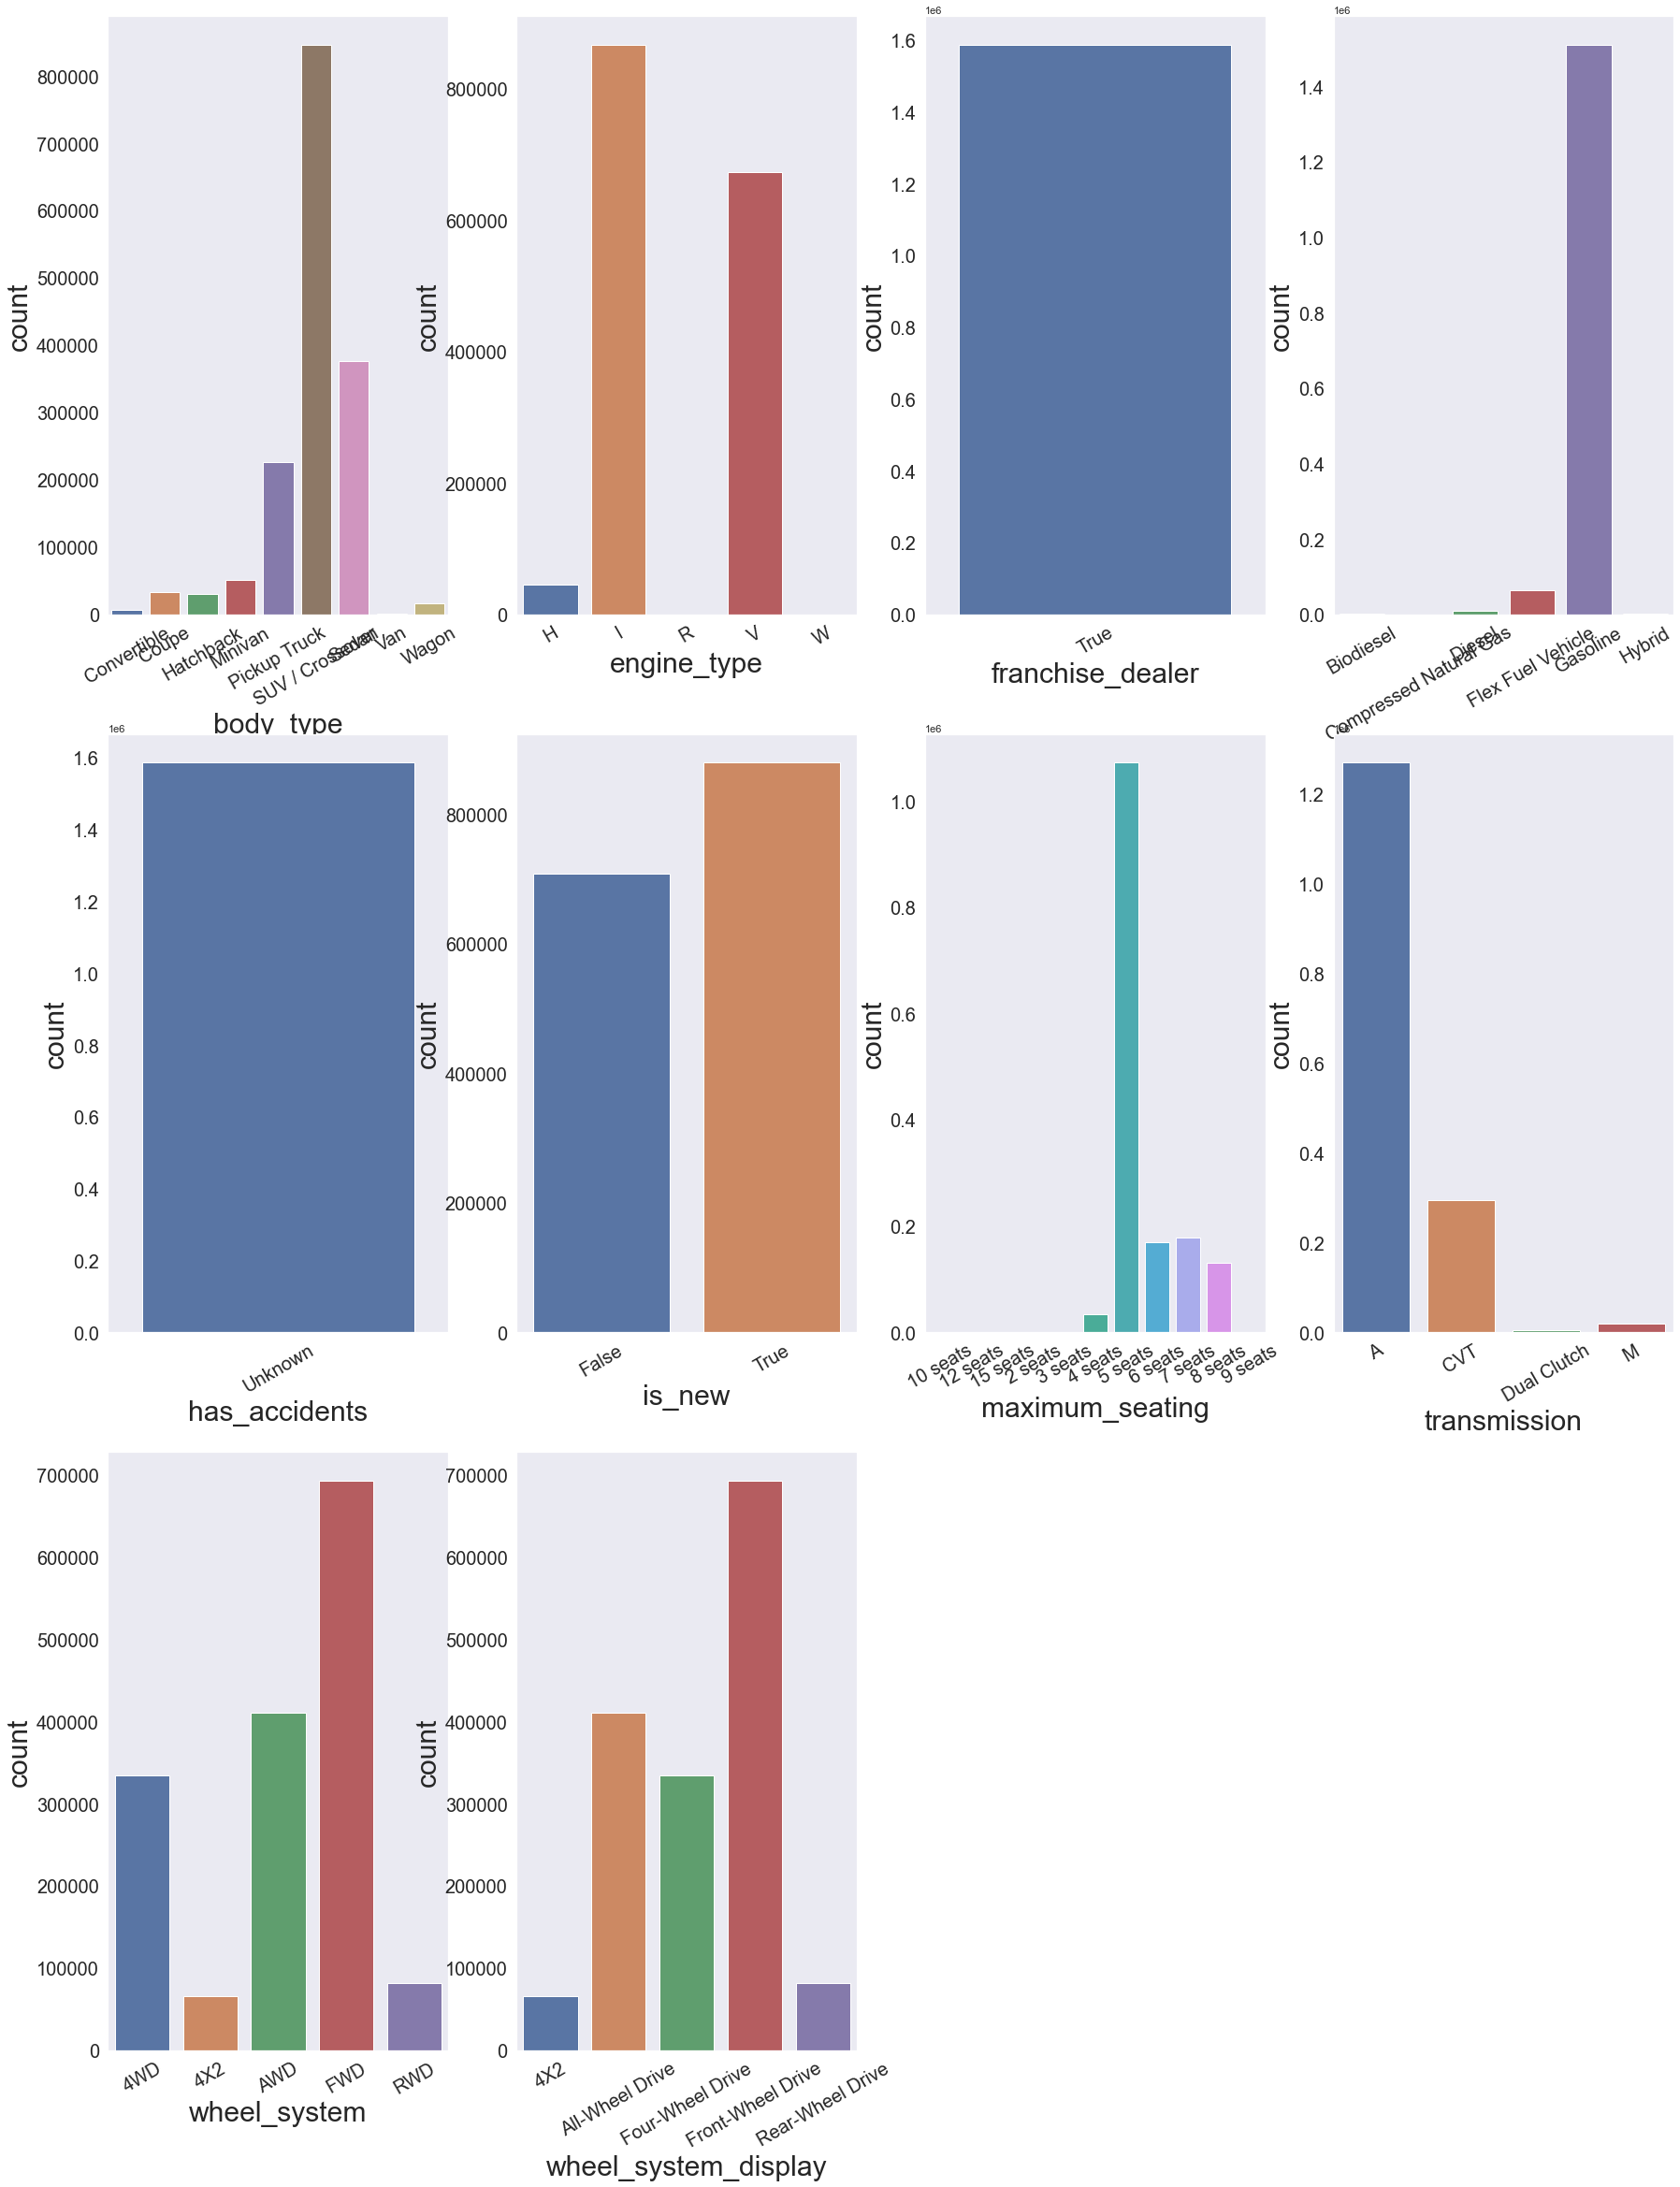

In [ ]:
sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df1.columns:
    plt.subplot(3,4,i)
    chart = sns.countplot(data = df1, x = column)
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'y', which = 'major', labelsize = 20)
    chart.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation = 30)
    
    i+=1

Note: Based on distribution above, franchise_dealer variable seems to be 100% True. Run additional analysis and omit variable if >50% True. 

In [ ]:
len(cars['franchise_dealer']) == len(cars[cars['franchise_dealer']==True])

True

In [ ]:
#since all are franchise, will also drop franchise_make since the user will be more focused on the price of the car and may not have a specific franchise they are looking at

cars = cars.drop(['franchise_dealer', 'franchise_make'], axis =1)

cars_subset = cars_subset.drop(['franchise_dealer', 'franchise_make'], axis =1)


### Assessing outliers using boxplot

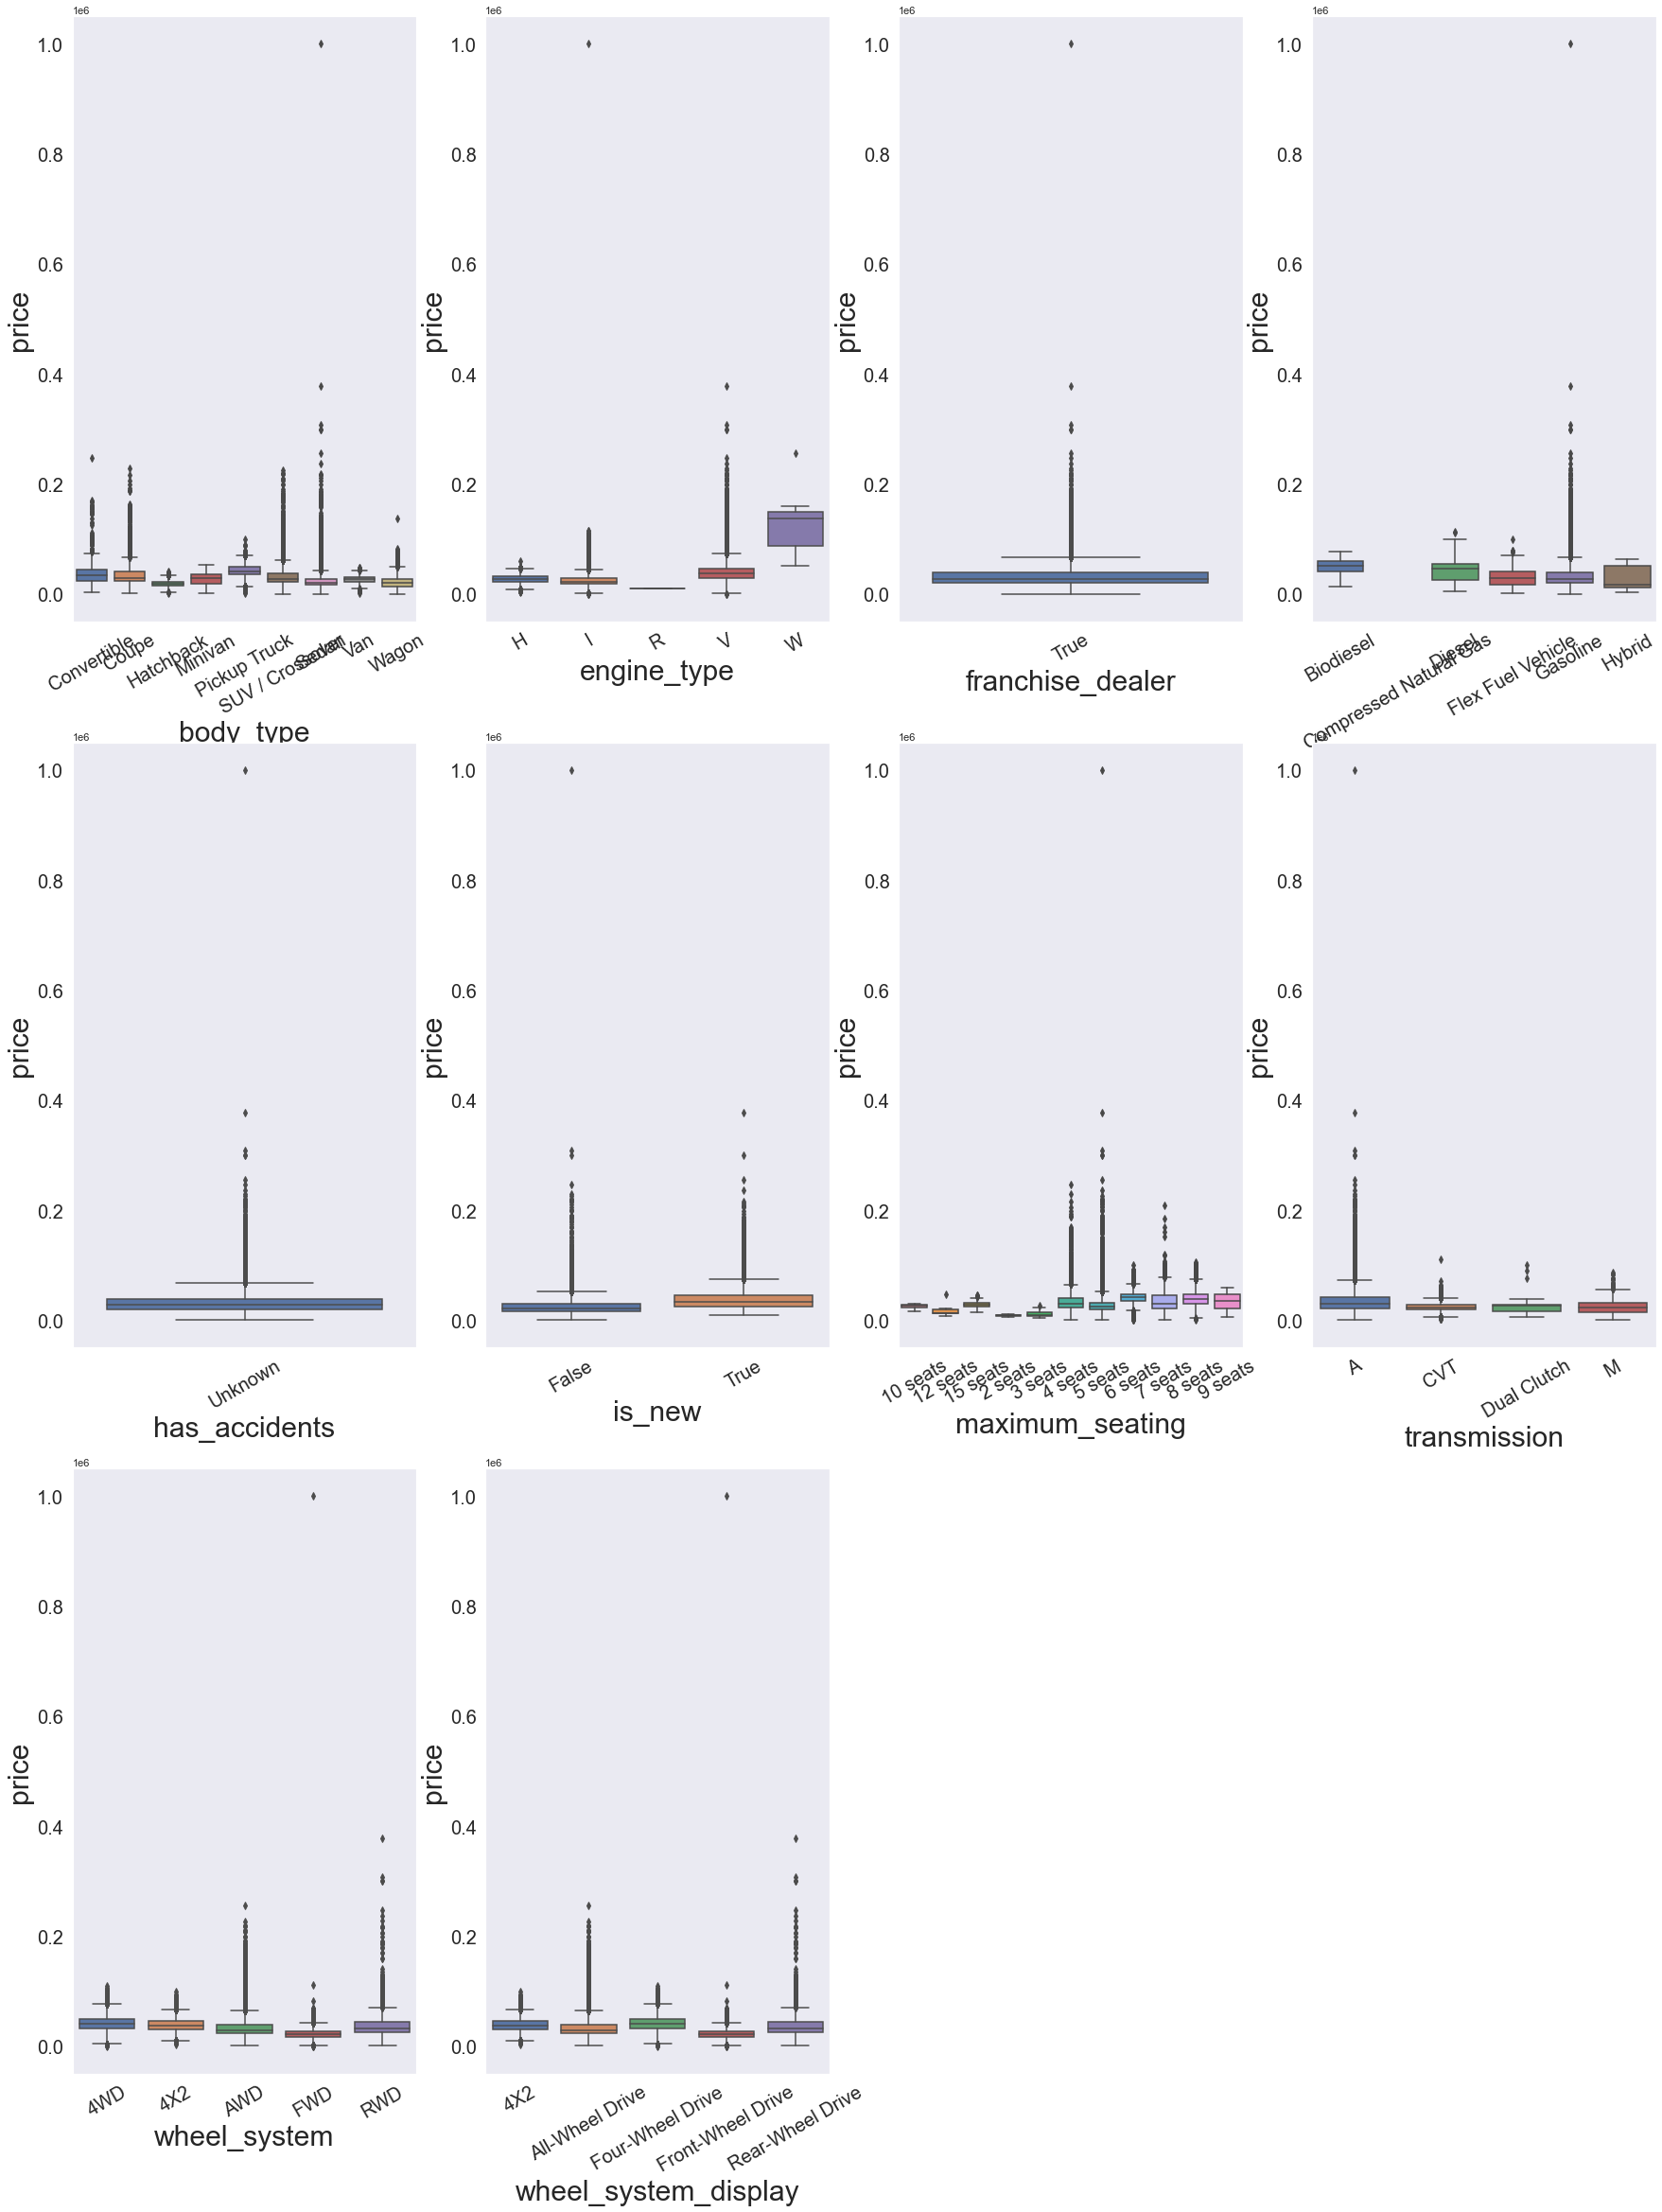

In [ ]:
df1['price'] = cars_subset['price']

sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df1.select_dtypes(include=['category', 'bool']):
    plt.subplot(3,4,i)
    chart = sns.boxplot(data = df1, x = column, y = 'price')
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'y', which = 'major', labelsize = 20)
    chart.tick_params(axis = 'x', which = 'major', labelsize = 20, rotation = 30)
    
    i+=1

### Checking correlations between categorical variables using Cramer's V

(please see the alternate file)

In [ ]:
# col_list = list(cars_subset.select_dtypes(include=['category', 'bool']))
# print(col_list)

In [ ]:
# # Convert categorical columns to object columns
# cars_object = cars_subset.apply(lambda x: x.astype("object") if x.dtype == ["category", "bool"] else x)

# # Instantiate a figure and axis object
# fig, ax = plt.subplots(figsize = (40, 15))

# # Estimate and generate Cramer's V association plot
# cramers_v = associations(cars_object[['body_type', 'city', 'engine_cylinders', 'engine_type', 'exterior_color', 'franchise_dealer', 'franchise_make', 'fuel_type', 'interior_color', 'is_new', 'listing_color', 'make_name', 'maximum_seating', 'model_name', 'power', 'sp_name', 'torque', 'transmission', 'transmission_display', 'trim_name', 'wheel_system', 'wheel_system_display']],
#                          nom_nom_assoc = 'cramer',
#                          ax = ax,
#                          cmap = "Blues")

### Descibing continuous variables

In [ ]:
cars_subset.describe(exclude=["category"], datetime_is_numeric=True)

,age,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,mileage,seller_rating,torque,wheelbase,width,cylinders,price
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,3.402445,38.163625,21.611050,75.659045,2887.430000,42.179162,18.232660,65.813419,28.722815,247.622245,36.999384,192.833461,-90.297298,20392.994455,4.258121,253.736470,114.630428,78.312956,5.088155,30971.591724
std,2.438527,3.053349,4.771212,102.151306,1218.549391,1.444819,4.401297,6.632485,5.507038,87.225008,5.031397,18.600172,13.516513,33227.858535,0.508973,97.301881,13.174292,7.220310,1.398247,15450.746538
min,1.000000,0.000000,9.000000,0.000000,1000.000000,35.800000,9.200000,50.000000,11.000000,55.000000,24.558900,139.600000,-123.401000,0.000000,1.000000,58.000000,90.600000,62.600000,2.000000,484.000000
25%,2.000000,36.100000,18.000000,15.000000,2000.000000,41.000000,14.800000,58.500000,25.000000,175.000000,33.459000,182.000000,-96.842100,5.000000,4.000000,176.000000,106.300000,72.600000,4.000000,20385.000000
50%,2.000000,38.300000,21.000000,36.000000,2500.000000,41.800000,17.900000,66.200000,28.000000,248.000000,37.977000,189.800000,-87.198700,23.000000,4.333333,258.000000,111.000000,77.300000,4.000000,27720.500000
75%,5.000000,39.900000,25.000000,83.000000,3500.000000,43.100000,21.000000,69.900000,32.000000,300.000000,41.060500,200.600000,-80.634100,32072.250000,4.595745,280.000000,118.100000,82.400000,6.000000,39055.000000
max,32.000000,47.500000,70.000000,2567.000000,6800.000000,52.500000,39.000000,108.600000,75.000000,808.000000,48.861600,263.900000,-67.226700,785778.000000,5.000000,811.000000,164.600000,98.600000,12.000000,999995.000000


##### Creating a dataframe with continuous variables

In [ ]:
df2 = pd.DataFrame()

for column in cars_subset.select_dtypes(exclude=['category']):
    df2[column] = cars[column]
        
display(df2)

,age,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,mileage,seller_rating,torque,wheelbase,width,cylinders,price
38,4,38.1,27.0,55,1500.0,42.0,15.8,57.6,36.0,160.0,40.7333,193.8,-73.2587,42394.0,3.447761,184,111.4,73.0,4,14639.0
40,4,27.3,18.0,36,3500.0,45.4,17.4,55.1,24.0,311.0,40.8847,184.8,-73.8317,62251.0,2.800000,280,107.5,81.5,6,32000.0
41,4,38.4,18.0,27,3600.0,41.0,19.4,70.7,27.0,310.0,40.7333,204.3,-73.2587,36410.0,3.447761,266,120.9,78.6,6,23723.0
45,5,36.8,15.0,27,3600.0,41.3,22.0,69.9,22.0,281.0,40.7333,203.7,-73.2587,36055.0,3.447761,266,118.9,78.5,6,22422.0
47,4,38.6,18.0,24,3600.0,40.3,24.6,69.3,25.0,295.0,40.7333,189.8,-73.2587,25745.0,3.447761,260,114.8,84.8,6,29424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000029,2,33.1,16.0,0,5700.0,42.0,18.5,57.7,25.0,375.0,38.2873,197.9,-122.2750,0.0,4.142857,410,116.0,85.4,8,45435.0
3000031,4,36.1,26.0,17,2500.0,45.0,18.0,57.9,37.0,179.0,38.2927,191.9,-122.2780,62138.0,4.333333,177,109.3,72.0,4,17700.0
3000034,5,32.6,18.0,89,3500.0,42.9,21.1,70.6,23.0,278.0,39.1346,212.3,-123.2050,20009.0,5.000000,265,127.4,75.2,6,40993.0
3000036,2,38.4,18.0,171,3600.0,41.0,19.4,70.7,27.0,310.0,38.1102,204.3,-122.2030,5.0,4.533333,266,120.9,78.6,6,36490.0


### Checking distribution of continuous variables

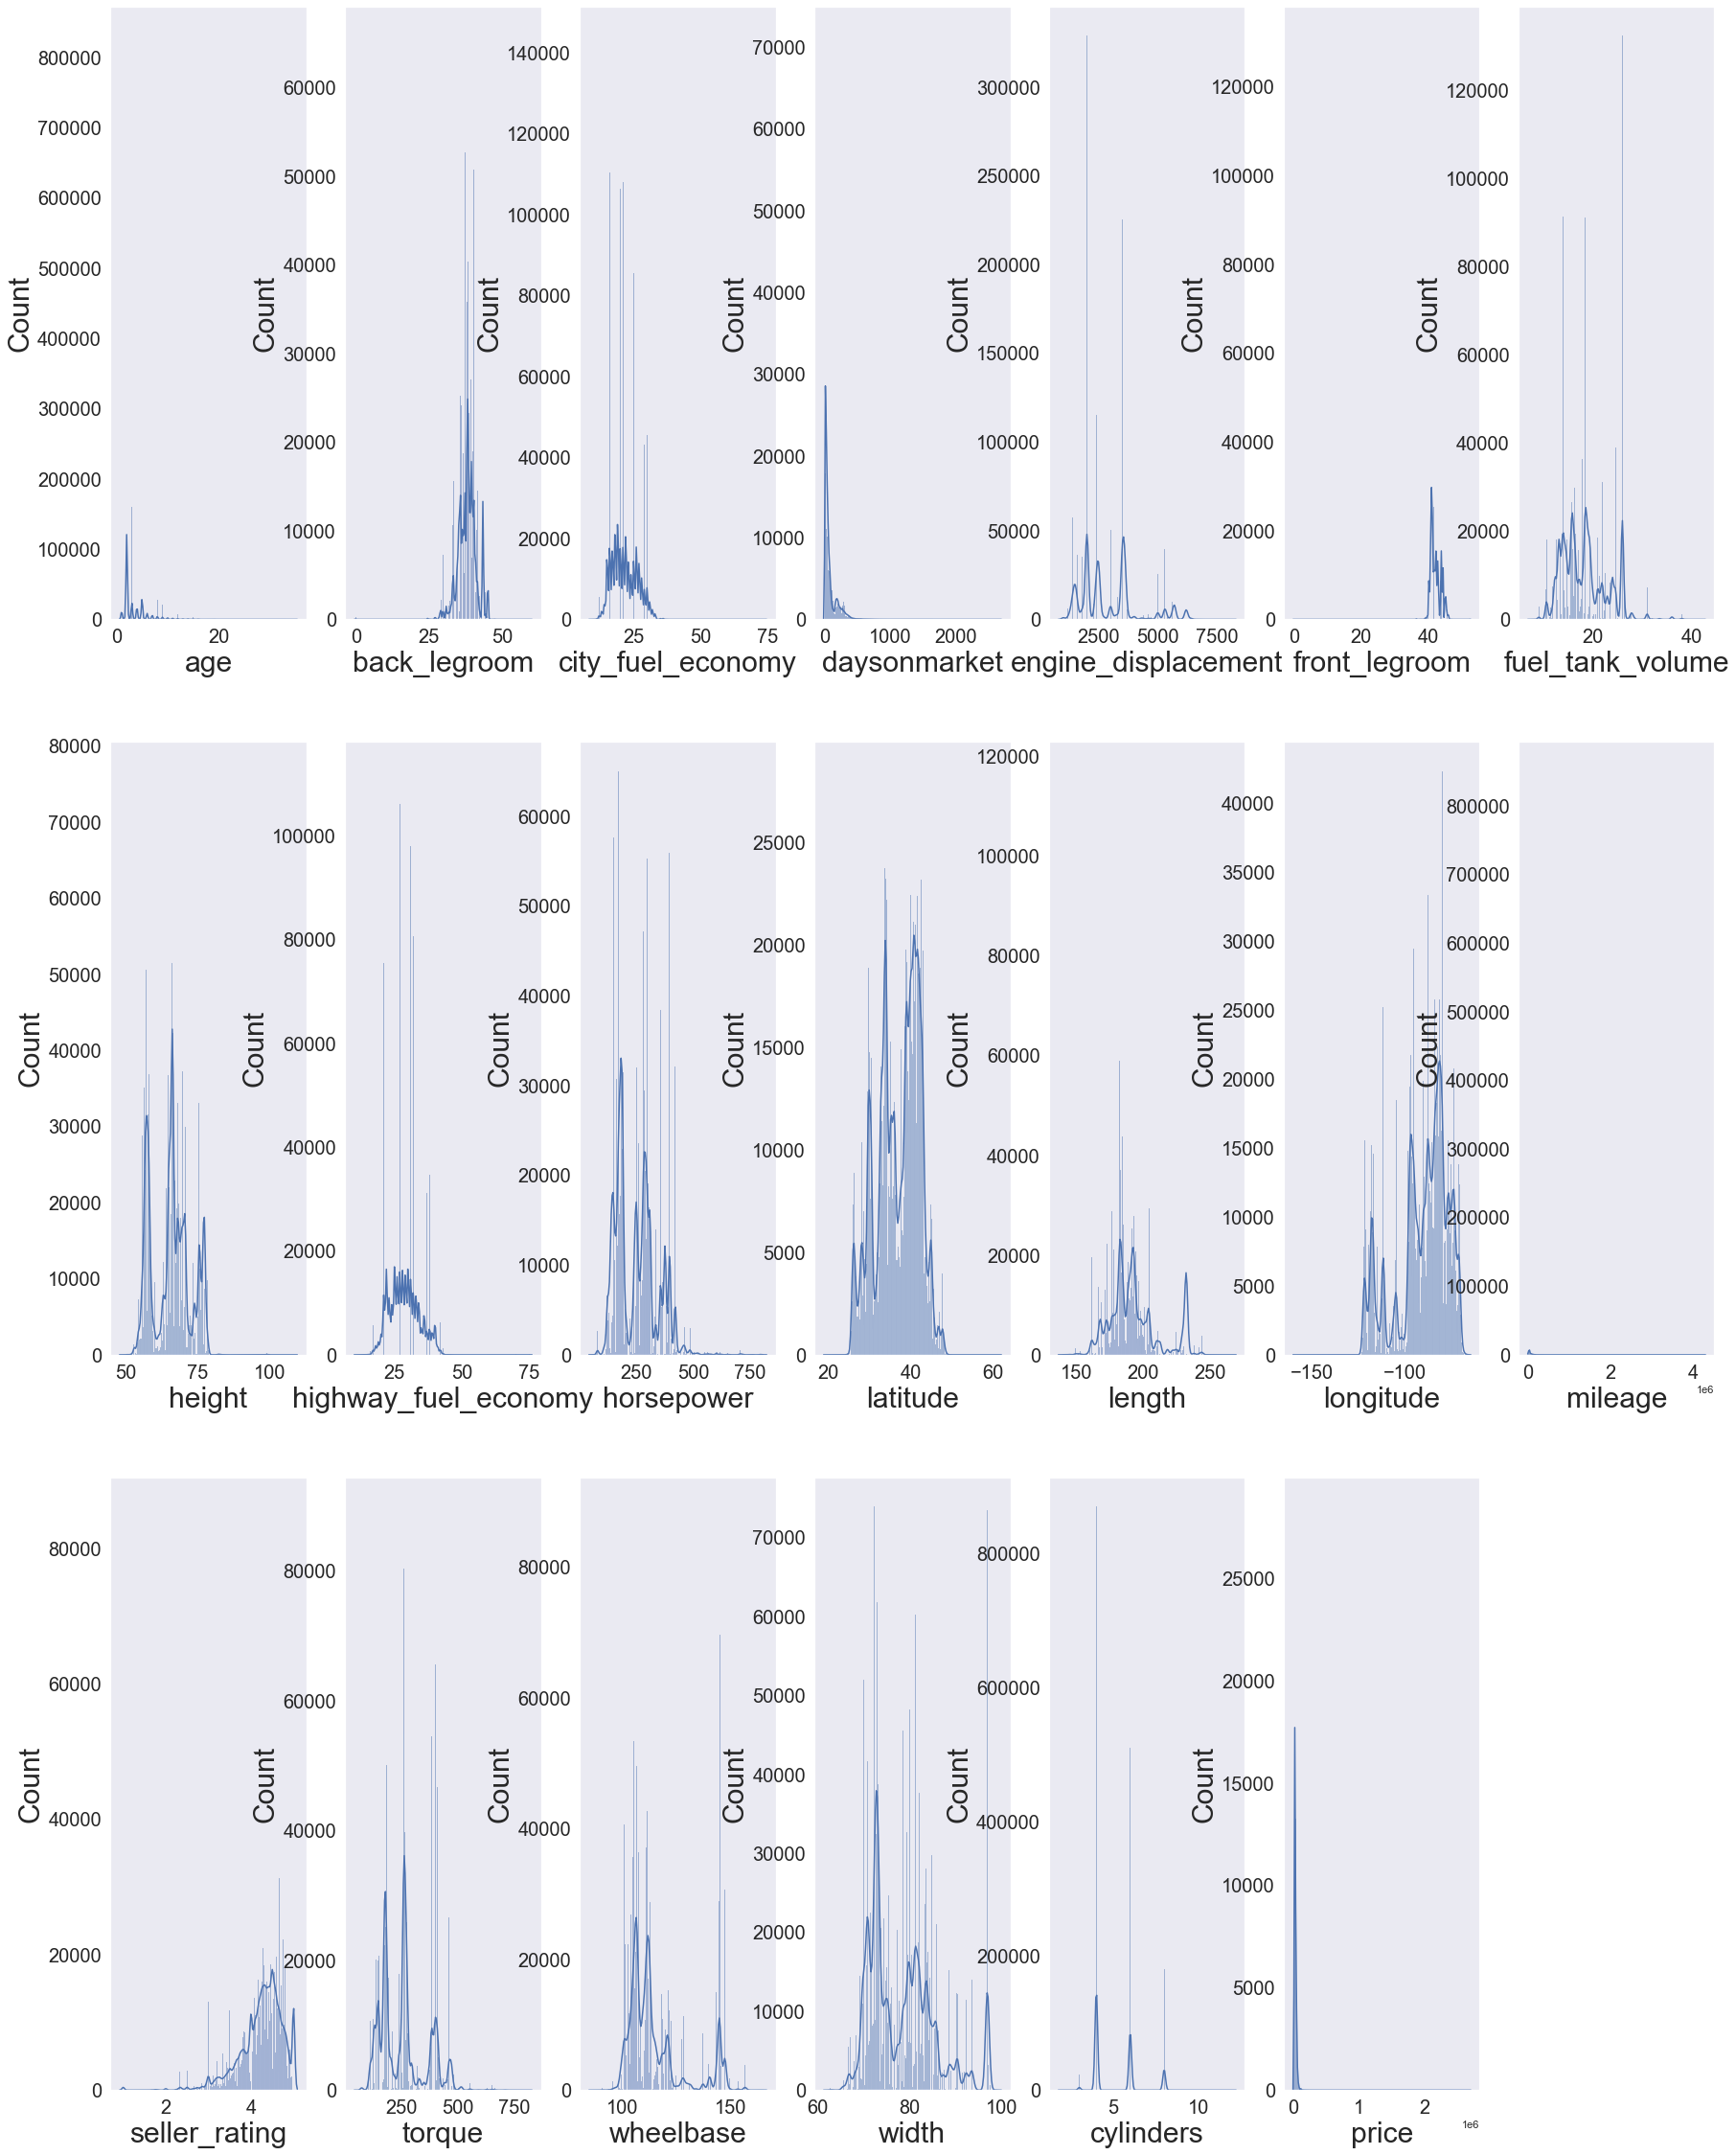

In [ ]:
sns.set(style='dark',)

fig = plt.figure(figsize=(30,40))

i = 1

for column in df2.columns:
    plt.subplot(3,7,i)
    chart = sns.histplot(df2[column], kde = True, kde_kws=dict(cut=3))
    chart.set_xlabel(chart.get_xlabel(), fontsize = 30)
    chart.set_ylabel(chart.get_ylabel(), fontsize = 30)
    chart.tick_params(axis = 'both', which = 'major', labelsize = 20)
    
    i+=1

### Checking correlations between continuous variables

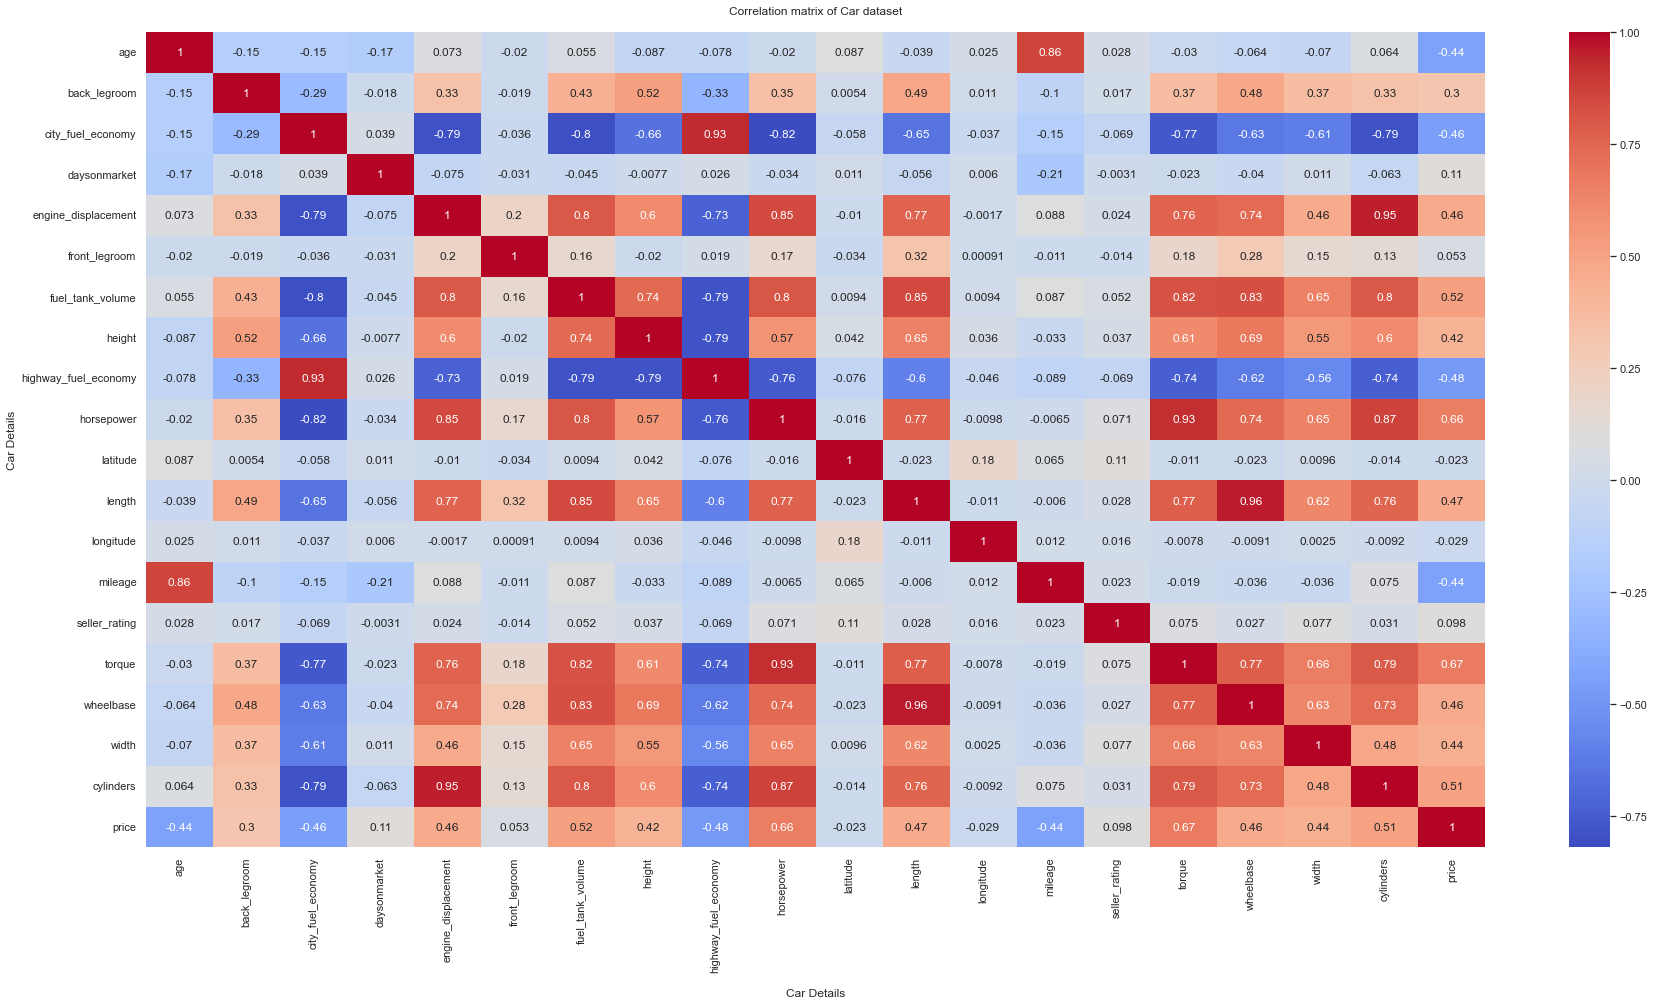

In [ ]:
plt.figure(figsize=(30,15))
hm = sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
hm.set(xlabel='\nCar Details', ylabel='Car Details', title = "Correlation matrix of Car dataset\n")
plt.show()

In [ ]:
df2_1 = df2.copy(deep=True)
df2_1 = df2_1.drop(['price'],axis=1)

Iteratively call the code below so that new plot can be generated based on dataset without certain columns

In [ ]:
# omits ['age','highway_fuel_economy','engine_displacement', 'cylinders', 'torque', 'wheelbase', 'fuel_tank_volume']

df2_1 = df2_1.drop(['age','highway_fuel_economy','engine_displacement', 'cylinders', 'torque', 'wheelbase', 'fuel_tank_volume'], axis = 1)



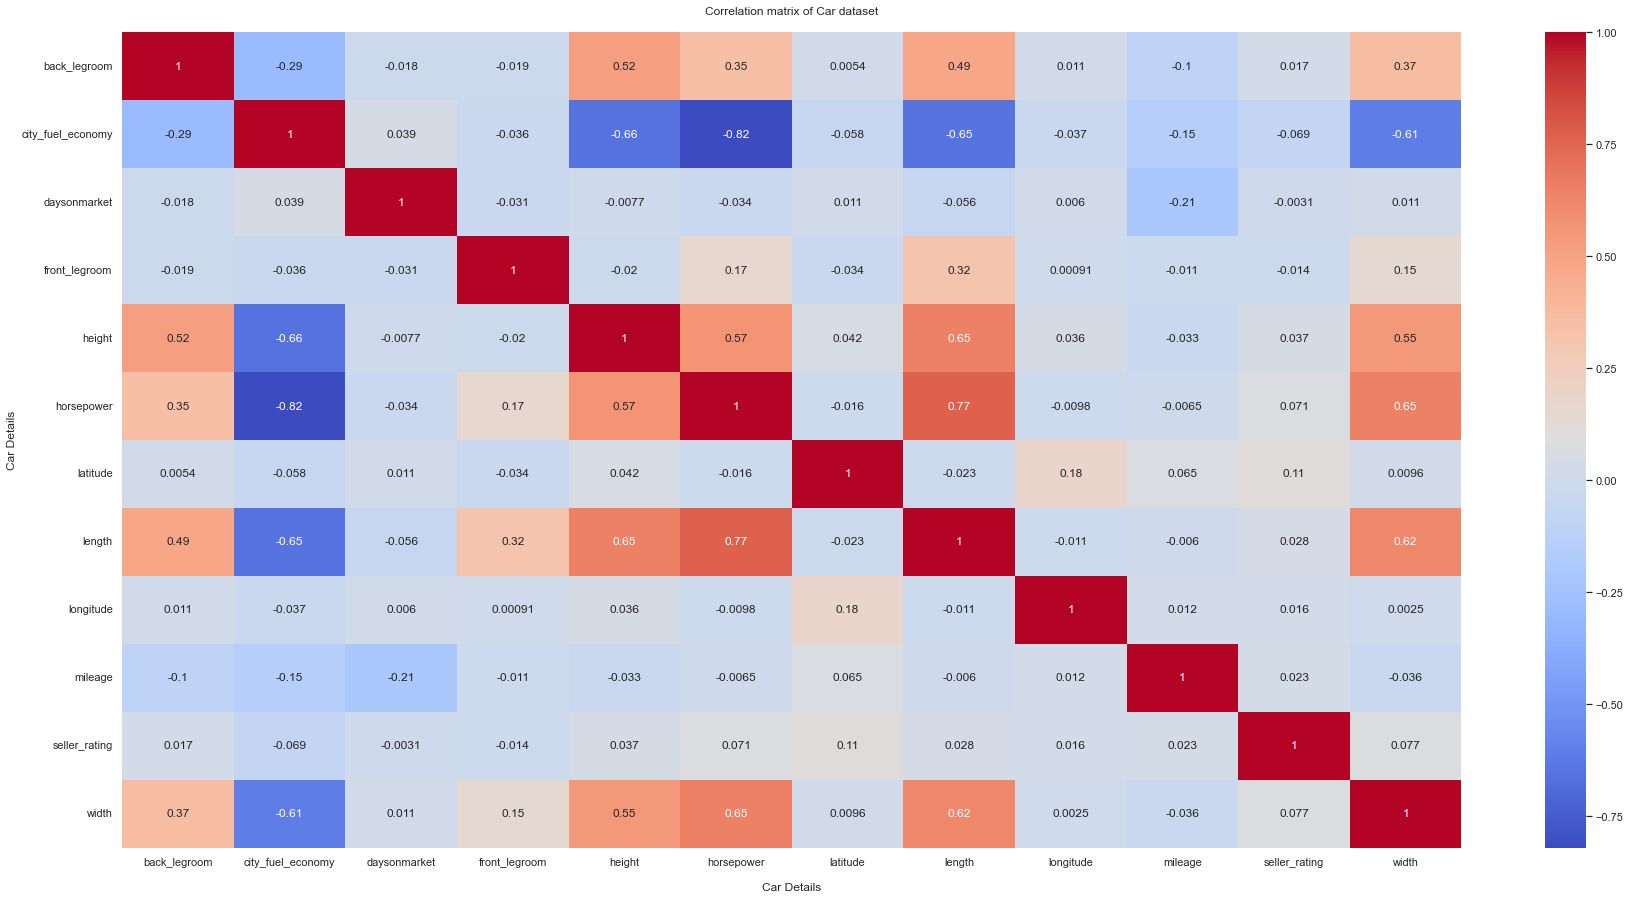

In [ ]:
plt.figure(figsize=(30,15))
hm = sns.heatmap(df2_1.corr(), annot = True, cmap = "coolwarm")
hm.set(xlabel='\nCar Details', ylabel='Car Details', title = "Correlation matrix of Car dataset\n")
plt.show()

### Calculating the Variance Inflation Factor

In [ ]:
df_vif = df2_1.dropna()

# df_vif # VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                   for i in range(len(df_vif.columns))]

vif_data.sort_values(by = "VIF", ascending = False)

,feature,VIF
3,front_legroom,550.022529
7,length,400.376776
0,back_legroom,235.102106
11,width,228.469286
4,height,228.266169
1,city_fuel_economy,82.072329
10,seller_rating,70.335550
6,latitude,55.688865
8,longitude,45.259154
5,horsepower,43.350615


In [ ]:
# omits =  ['latitude', 'longitude', 'front_legroom', 'back_legroom', 'width', 'height', 'length']

df2_1 = df2_1.drop(['latitude', 'longitude', 'front_legroom', 'back_legroom', 'width', 'height', 'length'], axis = 1)


In [ ]:
df_vif = df2_1.dropna()

# df_vif # VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                   for i in range(len(df_vif.columns))]

vif_data.sort_values(by = "VIF", ascending = False)

,feature,VIF
4,seller_rating,51.080600
0,city_fuel_economy,22.886515
2,horsepower,12.146946
1,daysonmarket,1.614684
3,mileage,1.444141


### Eliminating variables with high correlation based Variance Inflation Factor and Correlation Matrix

In [ ]:
# cars = cars.drop(['interior_color', 'exterior_color', 'sp_name', 'latitude', 'longitude', 'trim_name', 'power', 'length', 'wheelbase', 'city_fuel_economy', 'franchise_make', 'transmission_display', 'engine_cylinders', 'wheel_system_display', 'city', 'model_name', 'make_name', 'front_legroom', 'height', 'width', 'back_legroom'], axis = 1)

drop_cols = ['age','highway_fuel_economy','engine_displacement', 'cylinders', 'torque', 'wheelbase', 'fuel_tank_volume'] + ['latitude', 'longitude', 'front_legroom', 'back_legroom', 'width', 'height', 'length']
cars = cars.drop(drop_cols, axis = 1)


### Check columns left in data & drop more columns with unknown meanings

In [233]:
cars.columns

Index(['body_type', 'city', 'city_fuel_economy', 'daysonmarket', 'dealer_zip',
       'engine_cylinders', 'engine_type', 'exterior_color', 'fuel_type',
       'has_accidents', 'horsepower', 'interior_color', 'is_new',
       'listing_color', 'make_name', 'maximum_seating', 'mileage', 'power',
       'seller_rating', 'sp_name', 'transmission', 'transmission_display',
       'trim_name', 'wheel_system', 'wheel_system_display', 'price'],
      dtype='object')

In [244]:
cars = cars.drop(['sp_name', 'city'], axis = 1)

### Check relationship between some categorical values

#### 'body_type' vs. 'maximum_seating'

In [237]:
# note 'price' is an arbritrary col here just used to make the count function work

cars.loc[:,['body_type','maximum_seating','price']].groupby(['body_type','maximum_seating']).count()

make_name
body_type       maximum_seating           
Convertible     10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  0
                3 seats                  0
                4 seats               7147
                5 seats                  6
                6 seats                  0
                7 seats                  0
                8 seats                  0
                9 seats                  0
Coupe           10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  0
                3 seats                  0
                4 seats              18193
                5 seats              14214
                6 seats                  6
                7 seats                  0
                8 seats                  0
                9 seats                  0
Hatchback       10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  0
                3 seats                  0
                4 seats               2111
                5 seats              28118
                6 seats                  0
                7 seats                  0
                8 seats                  0
                9 seats                  0
Minivan         10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  0
                3 seats                  0
                4 seats                  0
                5 seats                  0
                6 seats                 87
                7 seats              19205
                8 seats              31341
                9 seats                  0
Pickup Truck    10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  1
                3 seats                257
                4 seats               2814
                5 seats              57181
                6 seats             166362
                7 seats                  0
                8 seats                  0
                9 seats                  0
SUV / Crossover 10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  5
                3 seats                  0
                4 seats               2857
                5 seats             582119
                6 seats               2543
                7 seats             158161
                8 seats              99808
                9 seats                964
Sedan           10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats                  0
                3 seats                  0
                4 seats                513
                5 seats             374270
                6 seats               1123
                7 seats                  0
                8 seats                  0
                9 seats                  0
Van             10 seats                53
                12 seats                43
                15 seats               600
                2 seats                  1
                3 seats                  0
                4 seats                  0
                5 seats                234
                6 seats                  0
                7 seats                 14
                8 seats                164
                9 seats                  0
Wagon           10 seats                 0
                12 seats                 0
                15 seats                 0
                2 seats           

Since there seems to be a relationship between 'body_type' and 'maximum_seating', omit 'maximum_seating'

In [238]:
cars = cars.drop(['maximum_seating'], axis = 1)

#### 'transmission_display' vs. 'transmission'

In [253]:
# note 'price' is an arbritrary col here just used to make the count function work
pd.set_option('display.max_rows', 128)
cars.loc[:,['transmission_display','transmission','price']].groupby(['transmission_display','transmission']).count()

price
transmission_display               transmission        
1-Speed Automatic                  A                 11
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
1-Speed CVT                        A                  0
                                   CVT                7
                                   Dual Clutch        0
                                   M                  0
10-Speed Automatic                 A                298
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
2-Speed Automatic                  A                  4
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
3-Speed Automatic                  A                 18
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
4-Speed Automatic                  A              10883
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
4-Speed Automatic Overdrive        A                 39
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
4-Speed Manual                     A                  0
                                   CVT                0
                                   Dual Clutch        0
                                   M                  1
5-Speed Automatic                  A              13726
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
5-Speed Automatic Overdrive        A                287
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
5-Speed Manual                     A                  0
                                   CVT                0
                                   Dual Clutch        0
                                   M               2070
5-Speed Manual Overdrive           A                  0
                                   CVT                0
                                   Dual Clutch        0
                                   M                 10
6-Speed Automatic                  A             239019
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
6-Speed Automatic Overdrive        A              14798
                                   CVT                0
                                   Dual Clutch        0
                                   M                  0
6-Speed CVT                        A                  0
                                   CVT              121
                                   Dual Clutch        0
                                   M                  0
6-Speed Dual Clutch                A                  0
                                   CVT                0
                                   Dual Clutch     1569
                                   M                  0
6-Speed Manual                     A                  0
                                   CVT                0
                                   Dual Clutch        0
                                   M              10279
6-Speed Manual Overdrive           A                  0
                                   CVT                0
                  

In [254]:
pd.set_option('display.max_rows', 50)


Since there seems to be a relationship between 'transmission_display' and 'transmission', omit 'transmission_display'

In [255]:
cars = cars.drop(['transmission_display'], axis = 1)

#### 'wheel_system' vs. 'wheel_system_display'

In [257]:
# note 'price' is an arbritrary col here just used to make the count function work

cars.loc[:,['wheel_system','wheel_system_display','price']].groupby(['wheel_system','wheel_system_display']).count()

price
wheel_system wheel_system_display        
4WD          4X2                        0
             All-Wheel Drive            0
             Four-Wheel Drive      334638
             Front-Wheel Drive          0
             Rear-Wheel Drive           0
4X2          4X2                    66020
             All-Wheel Drive            0
             Four-Wheel Drive           0
             Front-Wheel Drive          0
             Rear-Wheel Drive           0
AWD          4X2                        0
             All-Wheel Drive       411025
             Four-Wheel Drive           0
             Front-Wheel Drive          0
             Rear-Wheel Drive           0
FWD          4X2                        0
             All-Wheel Drive            0
             Four-Wheel Drive           0
             Front-Wheel Drive     693572
             Rear-Wheel Drive           0
RWD          4X2                        0
             All-Wheel Drive            0
             Four-Wheel Drive           0
             Front-Wheel Drive          0
             Rear-Wheel Drive       81454

Since there seems to be a relationship between 'wheel_system_display' and 'wheel_system', omit 'wheel_system'

In [258]:
cars = cars.drop(['wheel_system'], axis = 1)

#### 'engine_cylinders' vs. 'engine_type'

In [261]:
# note 'price' is an arbritrary col here just used to make the count function work
pd.set_option('display.max_rows', 130)
cars.loc[:,['engine_cylinders','engine_type','price']].groupby(['engine_cylinders','engine_type']).count()

price
engine_cylinders          engine_type        
H4                        H             44629
                          I                 0
                          R                 0
                          V                 0
                          W                 0
H4 Hybrid                 H                49
                          I                 0
                          R                 0
                          V                 0
                          W                 0
H6                        H               904
                          I                 0
                          R                 0
                          V                 0
                          W                 0
I3                        H                 0
                          I             23078
                          R                 0
                          V                 0
                          W                 0
I4                        H                 0
                          I            819321
                          R                 0
                          V                 0
                          W                 0
I4 Compressed Natural Gas H                 0
                          I                 6
                          R                 0
                          V                 0
                          W                 0
I4 Diesel                 H                 0
                          I              2542
                          R                 0
                          V                 0
                          W                 0
I4 Flex Fuel Vehicle      H                 0
                          I              3288
                          R                 0
                          V                 0
                          W                 0
I4 Hybrid                 H                 0
                          I               359
                          R                 0
                          V                 0
                          W                 0
I5                        H                 0
                          I              1185
                          R                 0
                          V                 0
                          W                 0
I6                        H                 0
                          I             12700
                          R                 0
                          V                 0
                          W                 0
I6 Diesel                 H                 0
                          I              4872
                          R                 0
                          V                 0
                          W                 0
I6 Hybrid                 H                 0
                          I                 4
                          R                 0
                          V                 0
                          W                 0
R2                        H                 0
                          I                 0
                          R                 4
                          V                 0
                          W                 0
V10                       H                 0
                          I                 0
                          R                 0
                          V                 6
                          W                 0
V12                       H                 0
                          I                 0
                          R                 0
                          V               284
                          W                 0
V6                        H                 0
                          I                 0
                          R                 0
                          V            454255
                          W                 0
V6 Biodiesel              H           

Since there seems to be a relationship between 'engine_cylinders' and 'engine_type', omit 'engine_cylinders'

In [262]:
cars = cars.drop(['engine_cylinders'], axis = 1)

#### 'exterior_color' vs. 'interior_color'

In [268]:
# pd.set_option('display.max_rows', 130)
cars.loc[:,['exterior_color' ,'interior_color','price']].groupby(['exterior_color' ,'interior_color']).count()

MemoryError: Unable to allocate 3.57 GiB for an array with shape (478511136,) and data type int64

Since there seems to be a relationship between 'exterior_color' and 'interior_color', omit 'interior_color'

In [ ]:
cars = cars.drop(['interior_color'], axis = 1)

### Final Check on columns

In [263]:
cars.columns

Index(['body_type', 'city', 'city_fuel_economy', 'daysonmarket', 'dealer_zip',
       'engine_type', 'exterior_color', 'fuel_type', 'has_accidents',
       'horsepower', 'interior_color', 'is_new', 'listing_color', 'make_name',
       'mileage', 'power', 'seller_rating', 'transmission', 'trim_name',
       'wheel_system_display', 'price'],
      dtype='object')

In [265]:
len(cars.columns)

21

In [ ]:
cars.dtypes

## Scaling the dataset

###  One-hot encoding for categorical variables

In [266]:
df3 = pd.DataFrame()

for column in cars.select_dtypes(include=['category']):
    df3[column] = cars[column]
        
df3.head()

,body_type,city,dealer_zip,engine_type,exterior_color,fuel_type,has_accidents,interior_color,is_new,listing_color,make_name,power,transmission,trim_name,wheel_system_display
38,Sedan,Bay Shore,11706,I,Silver Ice Metallic,Gasoline,Unknown,Jet Black,False,SILVER,Chevrolet,"160 hp @ 5,700 RPM",A,LT FWD,Front-Wheel Drive
40,Coupe,Bronx,10466,V,Black,Gasoline,Unknown,Black,False,BLACK,Lexus,"311 hp @ 6,600 RPM",A,AWD,All-Wheel Drive
41,SUV / Crossover,Bay Shore,11706,V,Silver Ice Metallic,Gasoline,Unknown,Dark Atmosphere/Medium Ash Gray,False,SILVER,Chevrolet,"310 hp @ 6,800 RPM",A,LT Cloth FWD,Front-Wheel Drive
45,SUV / Crossover,Bay Shore,11706,V,Silver Ice Metallic,Gasoline,Unknown,Dark Titanium/Light Titanium,False,SILVER,Chevrolet,"281 hp @ 6,300 RPM",A,1LT AWD,All-Wheel Drive
47,SUV / Crossover,Bay Shore,11706,V,Diamond Black Crystal Pearlcoat,Gasoline,Unknown,Black,False,BLACK,Jeep,"295 hp @ 6,400 RPM",A,Altitude 4WD,Four-Wheel Drive


In [267]:
df5 = pd.get_dummies(df3, drop_first = True)

MemoryError: Unable to allocate 6.92 GiB for an array with shape (4684, 1586709) and data type uint8

In [ ]:
df5.head()

### Concatenating categorical variables dataframe with continuous variables dataframe post one-hot encoding

In [ ]:
df4 = pd.DataFrame()

for column in cars.select_dtypes(exclude=['category']):
    df4[column] = cars[column]
        
df4.head()

In [ ]:
cars_coded = pd.concat([df5, df4], axis=1)

In [ ]:
cars_coded.head()

In [ ]:
cars_coded.shape()

### Save dataset to csv

In [ ]:
cars_coded.to_csv('cars_coded.csv', index=False)

### Splitting the dataset into train and test sets

In [ ]:
# cars_coded = pd.read_csv("cars_coded.csv")

In [ ]:
cars_array = cars_coded.to_numpy()

In [ ]:
np.random.seed(2023)

train = np.random.choice([True, False], cars_array.shape[0], replace = True, p = [0.8, 0.2])
x_train = cars_array[train, :-1]
y_train = cars_array[train, -1]
x_test = cars_array[~train, :-1]
y_test = cars_array[~train, -1]


### Scaling the train and test sets using Robust and Standard Scaler

Robust and Standard scaling helps with eliminating the outliers, normalizing, and standardizing the datasets

In [ ]:
def scaling(x, y):
    scale = preprocessing.RobustScaler()
    x_t1 = scale.fit_transform(x[:, :-1], y)
    
    scale = preprocessing.StandardScaler()
    x_t2 = scale.fit_transform(x_t1, y)
    
    return(x_t2)

In [ ]:
x_train_scaled = scaling(x_train, y_train)
x_test_scaled = scaling(x_test, y_test)